[Study link](https://www.freecodecamp.org/news/pytorch-full-course/)

[Tensor Document](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
import numpy as np

In [4]:
import torchvision
import torchvision.transforms as transforms

### Download and Transform CIFAR10 DATASET

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### Lets Verify Trainset and Testset data

In [7]:
len(trainset), len(testset)

(50000, 10000)

In [8]:
trainset.classes, testset.classes

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [9]:
image, label = trainset[0]
print(image.shape, label)
image

torch.Size([3, 32, 32]) 6


tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [10]:
image, label = testset[0]
print(image.shape, label)
image

torch.Size([3, 32, 32]) 3


tensor([[[ 0.2392,  0.2471,  0.2941,  ...,  0.0745, -0.0118, -0.0902],
         [ 0.1922,  0.1843,  0.2471,  ...,  0.0667, -0.0196, -0.0667],
         [ 0.1843,  0.1843,  0.2392,  ...,  0.0902,  0.0196, -0.0588],
         ...,
         [-0.4667, -0.6706, -0.7569,  ..., -0.7020, -0.8980, -0.6863],
         [-0.5216, -0.6157, -0.7255,  ..., -0.7961, -0.7725, -0.8431],
         [-0.5765, -0.5608, -0.6471,  ..., -0.8118, -0.7333, -0.8353]],

        [[-0.1216, -0.1294, -0.0902,  ..., -0.2549, -0.2863, -0.3333],
         [-0.1216, -0.1373, -0.1059,  ..., -0.2549, -0.2863, -0.3098],
         [-0.1373, -0.1451, -0.1294,  ..., -0.2314, -0.2549, -0.3020],
         ...,
         [-0.0275, -0.2157, -0.3098,  ..., -0.2392, -0.4980, -0.3333],
         [-0.0902, -0.2000, -0.3333,  ..., -0.3569, -0.3569, -0.4980],
         [-0.1608, -0.1765, -0.3020,  ..., -0.3961, -0.3412, -0.4745]],

        [[-0.6157, -0.6314, -0.6000,  ..., -0.7176, -0.7176, -0.7412],
         [-0.6000, -0.6863, -0.6471,  ..., -0

### Simple CNN Model Example

In [11]:
# 3- Input Channels(RGB), 8- Output Channnels 
simpl_model = nn.Sequential(
    nn.Conv2d(3,8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2))

In [11]:
# to learn more
?nn.Conv2d

### An Ideal CNN Model Example

In [12]:
model = nn.Sequential(
    nn.Conv2d(3,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #OUTPUT - bs(batch size) x 16 x 16 x 16
    
    nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #OUTPUT - bs(batch size) x 16 x 8 x 8
    
    nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #OUTPUT - bs(batch size) x 16 x 4 x 4

    nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #OUTPUT - bs(batch size) x 16 x 2 x 2

    nn.Conv2d(16,16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #OUTPUT - bs(batch size) x 16 x 1 x 1
    
    
    nn.Flatten(),     #OUTPUT - bs(batch size) x 16 
    nn.Linear(16,10)   # FOR 10 LABELS Clasification IMAGE

)

In [13]:
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [14]:
model[0].weight.shape, model[3].weight.shape, model[6].weight.shape, model[9].weight.shape, model[12].weight.shape,model[16].weight.shape

(torch.Size([16, 3, 3, 3]),
 torch.Size([16, 16, 3, 3]),
 torch.Size([16, 16, 3, 3]),
 torch.Size([16, 16, 3, 3]),
 torch.Size([16, 16, 3, 3]),
 torch.Size([10, 16]))

### Lets load the dataset into batches 

In [17]:
# from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
batch_size=100

In [18]:
import matplotlib.pyplot as plt

In [19]:
def show_image(image, label):
    print('label:',trainset.classes[label], "("+str(label)+")")
    plt.imshow(image.permute(1,2,0))   # moves dimension of image tensor as matplot has channels at the end not in begining

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: frog (6)


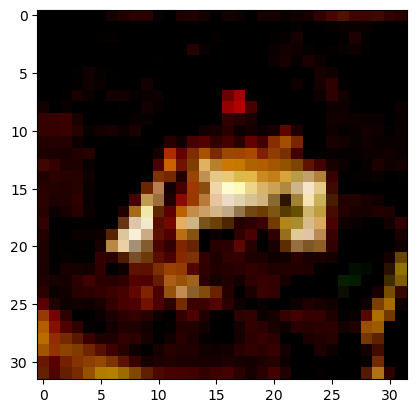

In [20]:
show_image(*trainset[0])

In [21]:
def show_image(image, label):
    print('label:',testset.classes[label], "("+str(label)+")")
    plt.imshow(image.permute(1,2,0)) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: cat (3)


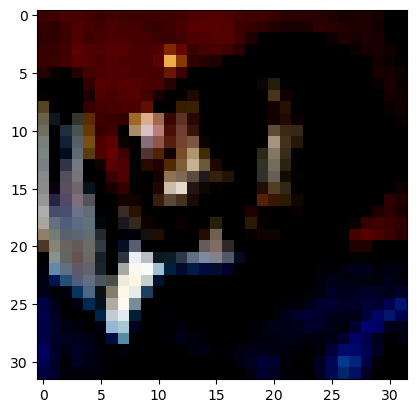

In [22]:
show_image(*testset[0])

In [23]:
load_train = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
load_test = DataLoader(dataset=testset, batch_size=batch_size)

In [24]:
from torchvision.utils import make_grid

In [25]:
def show_batch(dl):
    for image, label in dl:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(image, 10).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


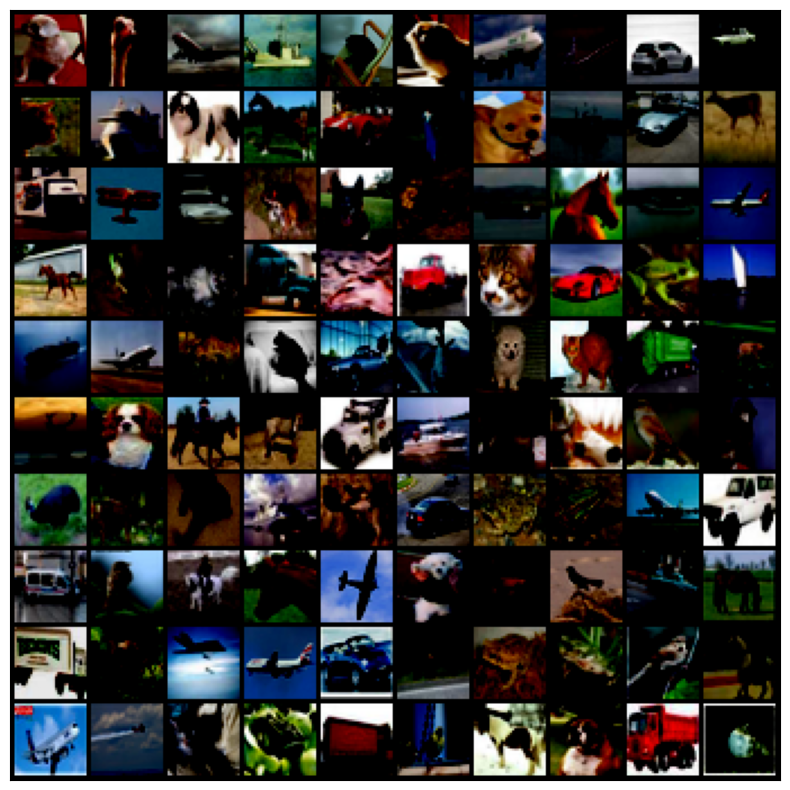

In [26]:
show_batch(dl=load_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


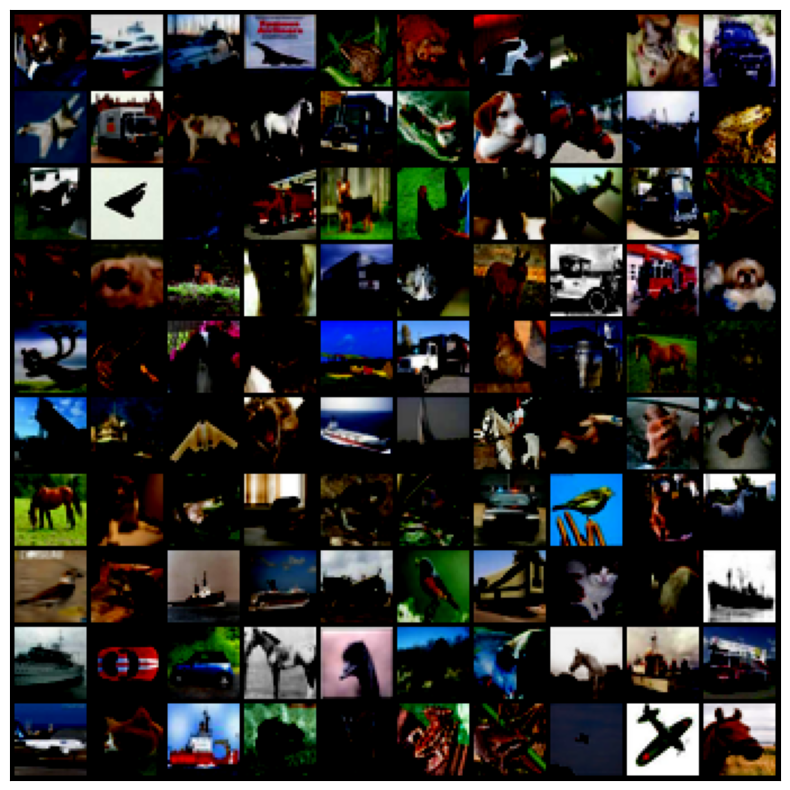

In [27]:
show_batch(dl=load_test)

In [28]:
len(load_train), len(load_test)

(500, 100)

In [29]:
model_cnn = nn.Sequential(
        nn.Conv2d(3,6, kernel_size=5, stride=1),
        nn.MaxPool2d(2,2),    # BS x 6 x 6 x 6 x 6 x 6
    
        nn.Conv2d(6,16, kernel_size=5, stride=1),   # BS X 16 X 3 X 3 X 3 X 3
    
        nn.Flatten(),
        nn.Linear(16*5*5,120),
        nn.Linear(120,84),
        nn.Linear(84,10)
)

In [30]:
model_cnn

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=400, out_features=120, bias=True)
  (5): Linear(in_features=120, out_features=84, bias=True)
  (6): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
model_cnn[0].weight.shape, model_cnn[2].weight.shape, model_cnn[4].weight.shape,model_cnn[5].weight.shape

(torch.Size([6, 3, 5, 5]),
 torch.Size([16, 6, 5, 5]),
 torch.Size([120, 400]),
 torch.Size([84, 120]))

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()    # super().__init__()  
        self.conv1 = nn.Conv2d(3,6, kernel_size=5) #Layer1
        self.maxpool = nn.MaxPool2d(2,2)    
        
        self.conv2 = nn.Conv2d(6,16, kernel_size=5)   #Layer2 
        # Full connected -
        self.linear1 = nn.Linear(16*5*5,120)     #Layer3
        self.linear2 = nn.Linear(120,84)      #Layer4
        self.linear3 = nn.Linear(84,10)       #Layer5
    
    def forward(self, x):
        
        x = self.maxpool(F.relu(self.conv1(x)))  # 1 layer 
        x = self.maxpool(F.relu(self.conv2(x)))  # 2 layer
       
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        
        x = self.linear1(x)   #Fully connected layers
        x = self.linear2(x)
        x = self.linear3(x)
        
        return x

model = Net()

In the __init__ method of the Net class:

	Define the layers of the CNN architecture in the following order:

		The first convolutional layer should have 3 input filters, 6 output filters, and a kernel size of 5x5.
		Define a max pooling layer with a kernel size of 2x2 and a stride of 2.
		The second convolutional layer should have 6 input filters, 16 output filters, and a kernel size of 5x5.

	Define three fully connected layers (nn.Linear) with appropriate input and output sizes:

		The first fully connected layer should have 16 * 5 * 5 input features and 120 output features.
		The second fully connected layer (fc2) should have 120 input features and 84 output features.
		The third fully connected layer (fc3) should have 84 input features and 10 output features.

In the forward method of the Net class:

Define the forward pass of the network:

	Apply the first convolutional layer followed by a ReLU activation function and then max pooling.
	Apply the second convolutional layer followed by a ReLU activation function and then max pooling.
	Flatten the output of the second convolutional layer using x.view.
	Pass the flattened output through the fully connected layers with ReLU activations.
	The output layer should not have any activation function.
    
Initilaize the loss function as Cross entropy loss. 
Initialize the Optimizer as stochastic gradient descent (SGD) with a momentum of  0.9 and a learning rate of 0.01.
 Run a forward pass through the model using the training data. What is the initial loss value?

In [33]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 62006


In [34]:
import torch.optim as optim

In [35]:
# Initialize loss function
criterion = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

### Let run  forward pass

In [36]:
inputs, labels = next(iter(load_train))

# Forward pass
outputs = model(inputs)

# Calculate loss
loss = criterion(outputs, labels)

In [37]:
loss

tensor(2.3009, grad_fn=<NllLossBackward0>)

In [38]:
optimizer.zero_grad()

In [39]:
for epoch in range(2):
    for i,(inputs, labels) in enumerate(load_train):
        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{2}], Step [{i+1}/{len(load_train)}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [1/500], Loss: 2.3049
Epoch [1/2], Step [101/500], Loss: 2.0987
Epoch [1/2], Step [201/500], Loss: 1.8547
Epoch [1/2], Step [301/500], Loss: 1.6286
Epoch [1/2], Step [401/500], Loss: 1.5644
Epoch [2/2], Step [1/500], Loss: 1.5810
Epoch [2/2], Step [101/500], Loss: 1.3078
Epoch [2/2], Step [201/500], Loss: 1.5599
Epoch [2/2], Step [301/500], Loss: 1.1946
Epoch [2/2], Step [401/500], Loss: 1.2102


Use torch.no_grad() to disable gradient tracking during testing.
	Iterate over the testloader to get batches of test data.

For each batch of data:

	Extract the images and their corresponding labels.
	Perform a forward pass through the network to get the predicted outputs.
	Get the predicted labels by taking the maximum value along the predicted output tensor.
	Update the total count of test samples.
	Count the number of correct predictions and update the correct variable. Calculate the accuracy of the network on the test dataset

In [40]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in load_test:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

Accuracy of the network on the 10000 test images: 54.06%


### test on dataset

In [42]:
print(correct/total)

0.5406
